In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3


In [2]:
# Create connection with SQLite Database
conn=sqlite3.connect("JoiningFiles.db")
c=conn.cursor()

# Open and read the file
open("ActiveDutyFY2022.pdf")
ndf=pd.read_csv("Active_Duty_FY2022.csv")

# # Set columns names to index 0
ndf.columns=ndf.iloc[0]

# # Now to drop index 0 because that is where the column names are
ndf=ndf.drop([0])

# # Rename Columns
ndf.rename(columns={"AirForce" : "AirForce/SpaceForce", "SpaceForce" : "Total DoD"})

# # Export changes to SQLite Database
ndf.to_sql("Active_Duty_FY2022", conn,if_exists="replace", index=False)




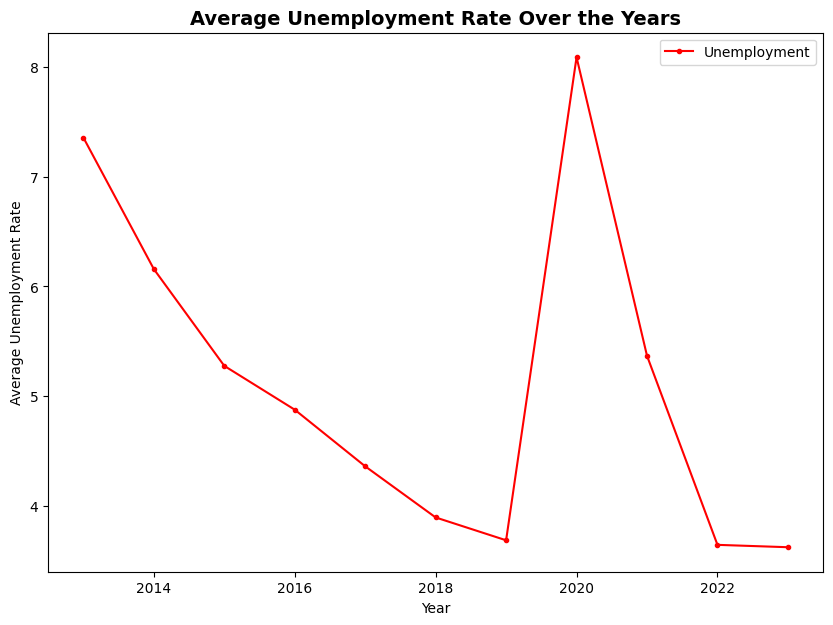

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Import unemployment data from csv into a data frame and create 
Unemployment = pd.read_csv(".//UnemploymentRate_FY2013_FY2023.csv")

# The Unemployment Rate for a specific year is represented by the mean of all months in that year
GroupedData = Unemployment.groupby("Year")["Unemployment Rate"].mean().reset_index()

# Extract the columns
Year = GroupedData["Year"]
Rate = GroupedData["Unemployment Rate"]

# Set fig size 
plt.figure(figsize=(10, 7))

# Add a title to the Plot 
plt.title('Average Unemployment Rate Over the Years', fontdict={'fontweight': 'bold', 'fontsize': 14})

# Plotting Unemployment Rate over the years
plt.plot(Year, Rate, 'r.-', label='Unemployment')

# Add X and Y labels 
plt.xlabel("Year")
plt.ylabel("Average Unemployment Rate")

# Add a legend 
plt.legend()

# Save your graph 
plt.savefig('UnemploymentRate.png', dpi=500)

# Show the plot (optional)
plt.show()
